# **Project Name**    - Flipkart Project (Customer service satisfaction)

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member**    - Pal Patel

# **Project Summary -**

In today’s hyper-competitive e-commerce market, customer service is more than just a support function; it is a defining factor that shapes brand reputation and customer loyalty. With multiple platforms offering similar product ranges, customers often decide where to shop based on how quickly and effectively their concerns are addressed. For Flipkart, as one of India’s largest e-commerce platforms, ensuring consistently high customer satisfaction is essential to maintaining its leadership position.

This project focuses on analyzing Flipkart’s customer service operations using a dataset that captures rich details about interactions between customers and service agents. The dataset includes features such as communication channel (call, chat, email), type of query or issue, timestamps for when an issue was reported and resolved, agent details (name, tenure, and shift), and customer responses such as satisfaction ratings (CSAT scores). These features provide both a quantitative and qualitative view of how service is delivered and perceived.

The primary goal of the project is to identify the key drivers of customer satisfaction. Customer satisfaction is not shaped by one factor alone; it is influenced by a mix of operational efficiency, product-related issues, and the human element of how agents handle queries. By studying factors such as handling time, issue resolution speed, agent experience, and customer remarks, the project aims to highlight what matters most to customers. For instance, we can assess whether faster responses consistently lead to higher CSAT scores or whether empathy and professionalism of agents play a stronger role.

Another focus area is performance benchmarking across teams and channels. Since customer issues range from product-related queries to delivery complaints, and are handled through multiple channels, it is important to analyze how each team performs. The dataset allows us to compare satisfaction levels across categories (e.g., “Product Queries” vs. “Logistics Complaints”), and across service channels like outcalls, live chat, or email. Similarly, agent-related attributes such as shift timing and tenure bucket (on-job training vs. experienced agents) can be studied to evaluate patterns in performance. These insights are critical for management to identify strong areas, highlight gaps, and replicate best practices across teams.

A third dimension of this project is to uncover actionable strategies for improvement. Insights derived from the analysis are not just descriptive but can directly inform decision-making. For example, if evening shift interactions show lower CSAT scores, additional staffing or targeted training might be necessary. If customers from certain cities or product categories consistently report lower satisfaction, Flipkart can look deeper into supply chain or product-level issues in those regions. Similarly, sentiment analysis of Customer Remarks can be used to complement CSAT scores and provide more nuanced understanding of customer expectations.

Improving customer satisfaction has direct and long-term benefits for Flipkart. A rise in CSAT scores not only indicates that customers feel heard and valued, but also enhances brand trust and loyalty. Satisfied customers are more likely to return for repeat purchases and recommend Flipkart to others, reducing customer churn and acquisition costs. Additionally, from an internal perspective, agent-level analysis empowers Flipkart to design better training programs, optimize shift allocations, and set up clear performance benchmarks for supervisors and managers.

What makes this project valuable is its dual focus: the micro-level analysis of individual interactions and the macro-level insights across teams and business processes. At the micro level, the project helps agents and supervisors learn from feedback to improve their handling of queries. At the macro level, it allows Flipkart to align customer service strategies with business objectives, ensuring that the customer experience remains a strong competitive advantage.

In conclusion, the Flipkart Customer Service Satisfaction Project is not just about analyzing data points; it is about understanding the customer voice and translating that understanding into better service experiences. By leveraging insights from the dataset, Flipkart can refine its customer service operations, elevate CSAT scores, and strengthen its position as a customer-first brand in the e-commerce landscape.

# **Problem Statement**

In the competitive e-commerce industry, customer service quality is a key differentiator that directly impacts customer loyalty and retention. Flipkart, as one of the leading platforms, handles thousands of customer interactions daily across multiple channels such as calls, chats, and emails. However, variations in response times, agent performance, and issue resolution often lead to inconsistent customer satisfaction levels.

The challenge lies in identifying the critical factors that influence Customer Satisfaction (CSAT) scores, evaluating performance across different service teams and channels, and uncovering areas where improvements can be made. Without actionable insights, Flipkart risks inefficiencies in service delivery, lower CSAT scores, and potential loss of customer trust.

This project aims to analyze customer interaction data to determine the drivers of satisfaction, measure team and agent performance, and recommend strategies to enhance service quality and overall customer experience.

#### **Business Objective**

The objective is to enhance Flipkart’s customer service experience by analyzing customer interaction data to identify key drivers of satisfaction, improve CSAT scores, and optimize agent and team performance. This will strengthen customer loyalty, increase retention, and build a competitive advantage in the e-commerce market.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
import shap
import joblib
import warnings
warnings.filterwarnings("ignore")

import os
import sys

In [ ]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

set_seed()
print("Random seed set to 42 for reproducibility.")

Random seed set to 42 for reproducibility.


### Dataset loading and first view

In [ ]:
df = pd.read_csv('Customer_support_data.csv')
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset rows and columns count

In [ ]:
print("No. of rows:", df.shape[0])
print("No. of columns:", df.shape[1])

No. of rows: 85907
No. of columns: 20


### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate values

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"No. of duplicate rows: {duplicate_count}")

No. of duplicate rows: 0


#### Missing/Null values

In [ ]:
print("Missing Values per Column:")
missing_counts = df.isnull().sum()
missing_counts

Missing Values per Column:


,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


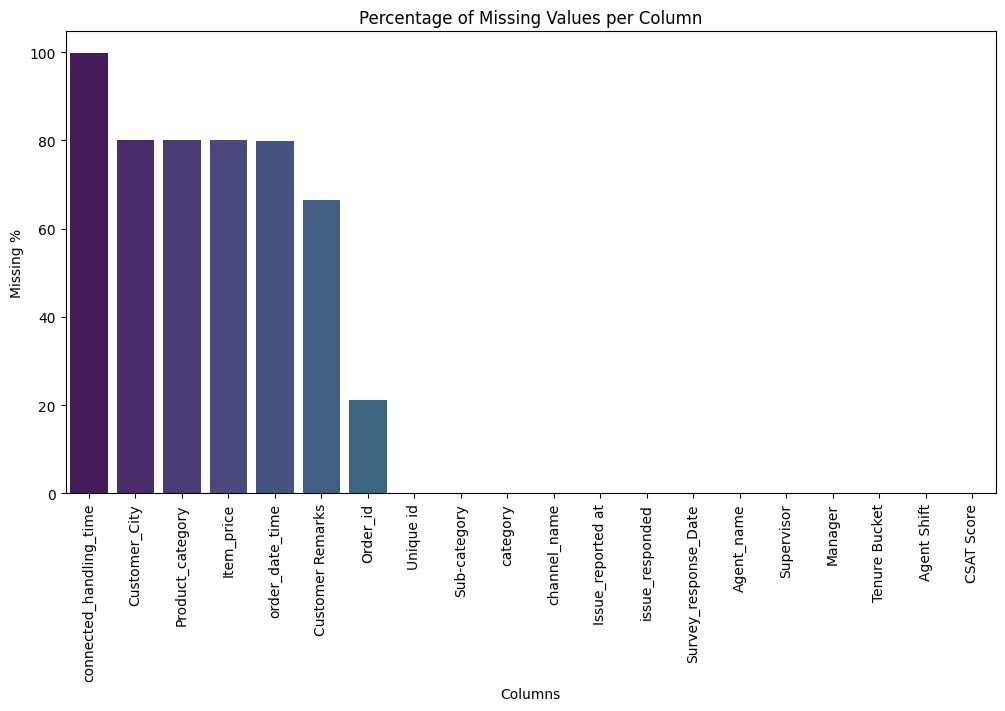

In [ ]:
# visualise missing values
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({"Missing Count": missing_counts, "Missing %": missing_percent})
missing_df = missing_df.sort_values(by="Missing %", ascending=False)
# bar plot is ideal for comparing missing percentages across specific important columns
plt.figure(figsize=(12,6))
sns.barplot(x=missing_df.index, y=missing_df["Missing %"], palette="viridis")
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Missing %")
plt.xlabel("Columns")
plt.show()

**Insights:**
- connected_handling_time has the highest missing values, indicating incomplete agent handling time records.
- Customer_City and Product_category also have significant missing data; this may affect regional or category-based analysis.
- Item_price and order_date_time have some missing values, which may impact revenue or time-based analysis.
- Customer_Remarks and Order_id have relatively lower missing values but still require cleaning.

**Business Impact:**
- High missing values in connected_handling_time could reduce accuracy in analyzing agent performance.
- Missing city or product info can lead to incomplete regional or category-specific insights.
- Cleaning/filling these missing values ensures better model training and more reliable CSAT predictions.

## ***2. Understanding Your Variables***

In [ ]:
# dataset columns
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# describing the dataset
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


#### Variable description

**1. Unique_id**  
- Type: Categorical / ID  
- Description: Unique identifier for each customer service interaction  
- Usage / Notes: Identifier only; not used for modeling

**2. channel_name**  
- Type: Categorical  
- Description: Communication channel used (Outcall, Chat, Email, etc.)  
- Usage / Notes: Useful for analyzing channel performance and CSAT differences

**3. category**  
- Type: Categorical  
- Description: Broad category of the issue (Product Queries, Complaints, etc.)  
- Usage / Notes: Key feature for CSAT modeling and trend analysis

**4. Sub-category**  
- Type: Categorical  
- Description: Detailed classification of issue (e.g., Life Insurance, Product Specific Information)  
- Usage / Notes: Can capture finer patterns in CSAT

**5. Customer_Remarks**  
- Type: Text / Categorical  
- Description: Free-text feedback/comments from customers  
- Usage / Notes: Optional for sentiment analysis; can enrich model or insights

**6. Order_id**  
- Type: Categorical / ID  
- Description: Identifier of the related order  
- Usage / Notes: Mainly for reference; not used as a feature

**7. order_date_time**  
- Type: Datetime  
- Description: Date and time of the order  
- Usage / Notes: Can derive order weekday, hour, or month for temporal analysis

**8. Issue_reported_at**  
- Type: Datetime  
- Description: Timestamp when issue was reported  
- Usage / Notes: Required to calculate handling time

**9. issue_responded**  
- Type: Datetime  
- Description: Timestamp when issue was responded to  
- Usage / Notes: Required to calculate handling time and response metrics

**10. Survey_response_Date**  
- Type: Datetime  
- Description: Date when the customer filled feedback survey  
- Usage / Notes: Can derive survey delay; useful for temporal analysis

**11. Customer_City**  
- Type: Categorical  
- Description: Customer’s city/location  
- Usage / Notes: Important for regional performance analysis

**12. Product_category**  
- Type: Categorical  
- Description: Type of product related to the interaction  
- Usage / Notes: Helps identify product-specific CSAT patterns

**13. Item_price**  
- Type: Numeric  
- Description: Price of the item involved  
- Usage / Notes: Can influence satisfaction; may need log transformation if skewed

**14. connected_handling_time**  
- Type: Numeric  
- Description: Time spent by agent handling the issue  
- Usage / Notes: Directly impacts CSAT; critical feature for modeling

**15. Agent_name**  
- Type: Categorical  
- Description: Name of agent handling the query  
- Usage / Notes: Useful for agent-level performance analysis; can use embeddings for modeling

**16. Supervisor**  
- Type: Categorical  
- Description: Supervisor responsible for the agent  
- Usage / Notes: Can be used for hierarchy-level analysis

**17. Manager**  
- Type: Categorical  
- Description: Manager overseeing the team  
- Usage / Notes: Useful for team-level benchmarking

**18. Tenure_Bucket**  
- Type: Categorical  
- Description: Agent experience level (On Job Training, >90 days, etc.)  
- Usage / Notes: Important to study effect of experience on CSAT

**19. Agent_Shift**  
- Type: Categorical  
- Description: Agent’s working shift (Morning, Evening, Night)  
- Usage / Notes: Can impact CSAT; useful for shift-level analysis

**20. CSAT_Score**  
- Type: Numeric / Ordinal  
- Description: Customer Satisfaction Score (1–5)  
- Usage / Notes: Target variable for prediction

**Key Points / Insights:**  
- Target variable: CSAT_Score  
- Features include categorical, numeric, datetime, and text columns  
- Derived features can include handling time, survey delay, weekday/hour from timestamps  
- High cardinality columns: Agent_name, Customer_City, Sub-category → suitable for embeddings in PyTorch  
- Columns with missing values to handle carefully: connected_handling_time, Customer_City, Product_category, Item_price


### Check Unique Values for each variable.

In [ ]:
print("No. of unique values in each column:")
df.nunique()

No. of unique values in each column:


,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


## ***3. Data Wrangling***

In [ ]:
# convert columns to datetime

datetime_cols = ["order_date_time", "Issue_reported at", "issue_responded", "Survey_response_Date"]
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # invalid parsing becomes NaT

print("Datetime conversion completed.")

Datetime conversion completed.


In [ ]:
# create Derived Features
# handling time in minutes
df["handling_time_min"] = (df["issue_responded"] - df["Issue_reported at"]).dt.total_seconds() / 60

# survey response delay in hours
df["survey_delay_hr"] = (df["Survey_response_Date"] - df["issue_responded"]).dt.total_seconds() / 3600

# order day of week and hour
df["order_dayofweek"] = df["order_date_time"].dt.day_name()
df["order_hour"] = df["order_date_time"].dt.hour

print("Derived features created: handling_time_min, survey_delay_hr, order_dayofweek, order_hour")

Derived features created: handling_time_min, survey_delay_hr, order_dayofweek, order_hour


In [ ]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,handling_time_min,survey_delay_hr,order_dayofweek,order_hour
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaT,2023-01-08 11:13:00,2023-01-08 11:47:00,2023-08-01,...,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34.0,4908.216667,NaN,NaN
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaT,2023-01-08 12:52:00,2023-01-08 12:54:00,2023-08-01,...,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2.0,4907.100000,NaN,NaN
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaT,2023-01-08 20:16:00,2023-01-08 20:38:00,2023-08-01,...,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22.0,4899.366667,NaN,NaN
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaT,2023-01-08 20:56:00,2023-01-08 21:16:00,2023-08-01,...,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20.0,4898.733333,NaN,NaN
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaT,2023-01-08 10:30:00,2023-01-08 10:32:00,2023-08-01,...,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2.0,4909.466667,NaN,NaN


### What all manipulations have you done and insights you found?

**Manipulations Done:**

1. **Datetime Conversion**  
   - Converted all date/time columns (`order_date_time`, `Issue_reported_at`, `issue_responded`, `Survey_response_Date`) into proper `datetime` objects.  
   - This enables time-based calculations like durations, trends, and weekday/hour analysis.

2. **Derived Features Created**  
   - **`handling_time_min`** → Time taken (in minutes) for the agent to respond after an issue was reported.  
   - **`survey_delay_hr`** → Delay (in hours) between the issue being responded to and the customer submitting the survey.  
   - **`order_dayofweek`** → Day of the week when the order was placed (e.g., Monday, Tuesday).  
   - **`order_hour`** → Hour of the day when the order was placed.  

**Insights Found So Far:**

- **Handling Time (`handling_time_min`)** will allow us to analyze whether **faster responses improve CSAT scores**.  
- **Survey Delay (`survey_delay_hr`)** can reveal whether customers tend to give feedback immediately (more emotional) or after some time (more rational).  
- **Order Day of Week & Hour** will help identify **peak ordering times** and link them with customer service workload (e.g., more queries during weekends or late evenings).  

These engineered features form the foundation for later EDA and modeling.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Distribution of CSAT Scores

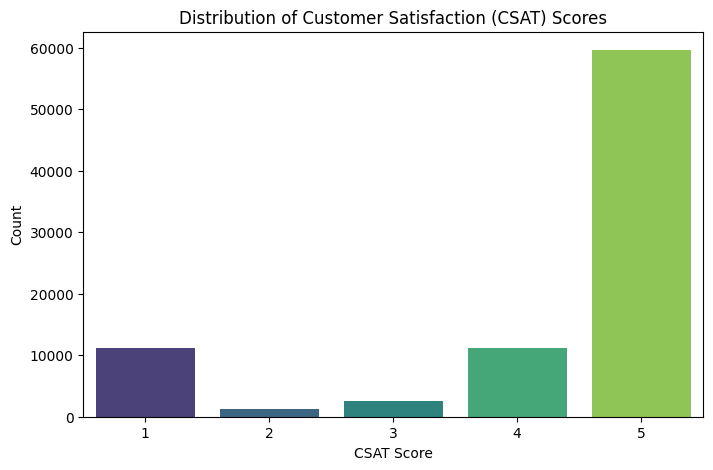

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="CSAT Score", data=df, palette="viridis")
plt.title("Distribution of Customer Satisfaction (CSAT) Scores")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()

**1. Why this chart?**  
A count plot is ideal to see how customer satisfaction scores (1–5) are distributed. This helps understand the overall sentiment of customers.

**2. Insights from the chart:**  
- Majority of customers give scores around 5.  
- Very few customers give the lowest score (1, 2), which shows extreme dissatisfaction is rare.  

**3. Business Impact:**  
Higher scores dominate -> It reflects strong customer loyalty and satisfaction.   


#### Chart 2: Customer Interaction Channels

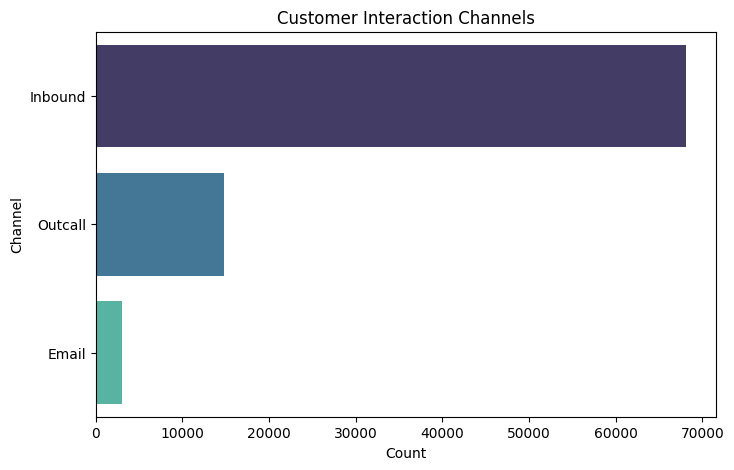

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y="channel_name", data=df, order=df["channel_name"].value_counts().index, palette="mako")
plt.title("Customer Interaction Channels")
plt.xlabel("Count")
plt.ylabel("Channel")
plt.show()

**1. Why this chart?**  
A horizontal bar chart helps compare usage frequency of channels (Inbound, Outcall, Email, etc.).

**2. Insights from the chart:**  
Shows the most (Inbound) and least (Email) used communication channels.  

**3. Business Impact:**  
Helps Flipkart allocate resources to high-traffic channels.  
Underperforming channels with low CSAT may require better staffing or technology support.

#### Chart 3: Top 10 Cities by Customer Interactions

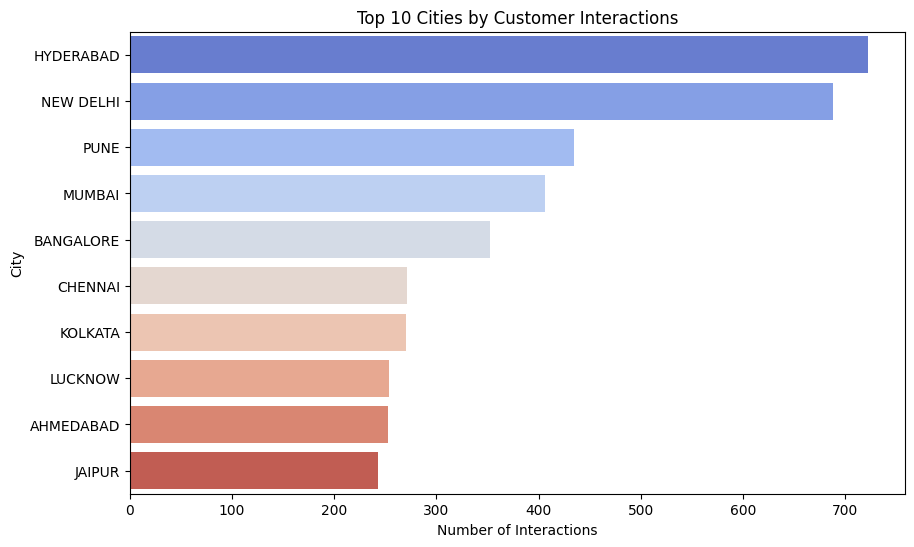

In [ ]:
plt.figure(figsize=(10,6))
top_cities = df["Customer_City"].value_counts().nlargest(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")
plt.title("Top 10 Cities by Customer Interactions")
plt.xlabel("Number of Interactions")
plt.ylabel("City")
plt.show()

**1. Why this chart?**  
Bar plots reveal which cities contribute the most to customer queries.

**2. Insights from the chart:**  
Identifies cities with maximum service demand (Hyderabad, New Delhi, Pune).  

**3. Business Impact:**  
Helps in region-specific planning (staffing, training).  
If certain cities show high complaints, Flipkart may need to review local logistics or vendor issues.  

#### Chart 4: Product Categories in Interactions

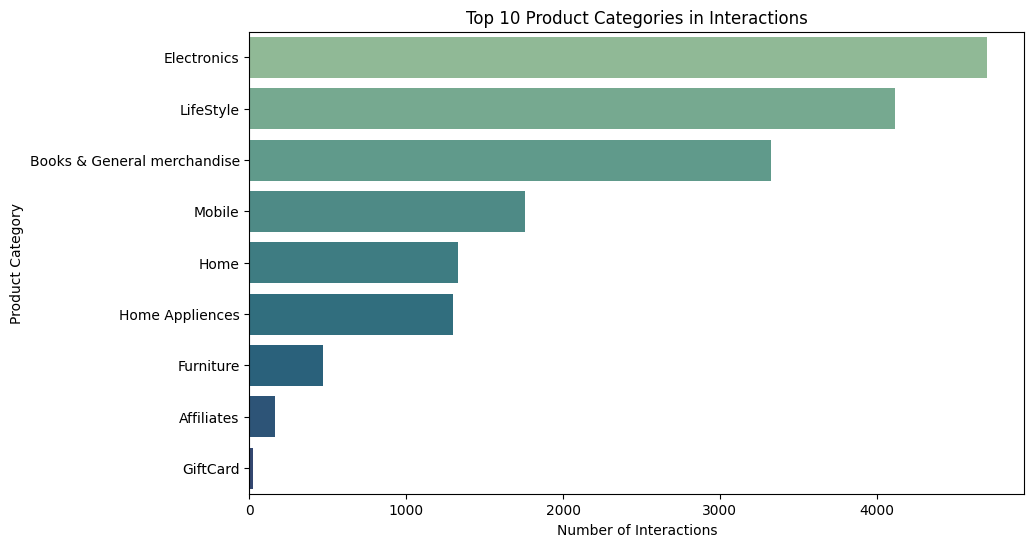

In [ ]:
plt.figure(figsize=(10,6))
top_products = df["Product_category"].value_counts().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="crest")
plt.title("Top 10 Product Categories in Interactions")
plt.xlabel("Number of Interactions")
plt.ylabel("Product Category")
plt.show()

**1. Why this chart?**  
To find which product types generate the most service interactions.

**2. Insights from the chart:**  
Highlights categories with frequent complaints or queries (Electronics, Lifestyle).

**3. Business Impact:**  
Guides product teams to improve quality in problematic categories.  
Too many complaints in one product category → risk of losing trust in that vertical.  

#### Chart 5: Distribution of Item Price

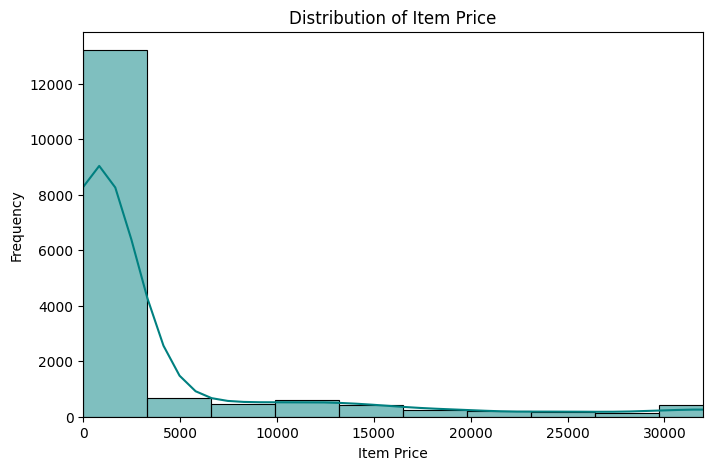

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Item_price"], bins=50, kde=True, color="teal")
plt.title("Distribution of Item Price")
plt.xlabel("Item Price")
plt.ylabel("Frequency")
plt.xlim(0, df["Item_price"].quantile(0.95))  # limit extreme outliers
plt.show()

**1. Why this chart?**  
A histogram shows whether queries mostly arise for low, mid, or high-value products.

**2. Insights from the chart:**  
Reveals the price band of 0-3000 where customers raise maximum issues.  

**3. Business Impact:**  
Helps Flipkart identify which price ranges need better packaging, delivery, or after-sales service.  
Too many issues in high-price items may affect premium customer trust.

#### Chart 6: Agent Shift Distribution

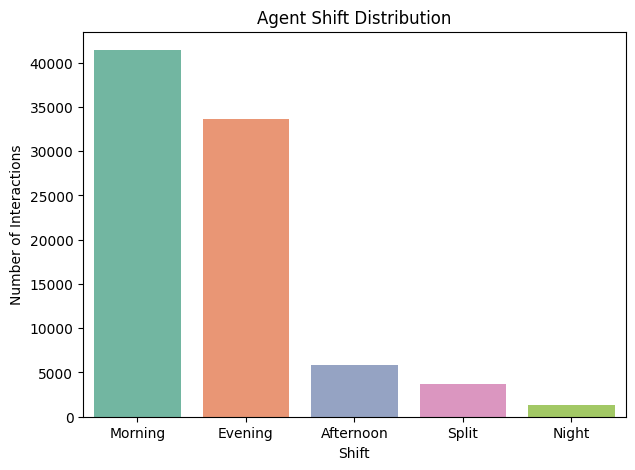

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x="Agent Shift", data=df, order=df["Agent Shift"].value_counts().index, palette="Set2")
plt.title("Agent Shift Distribution")
plt.xlabel("Shift")
plt.ylabel("Number of Interactions")
plt.show()

**1. Why this chart?**  
To compare how many queries are handled across different shifts (Morning, Evening, Afternoon, Split, Night).

**2. Insights from the chart:**  
Shows Morning shift having the highest workload.  

**3. Business Impact:**  
Enables better staffing allocation across shifts.  
If one shift is overloaded, agent performance and customer satisfaction may decline.  

#### Chart 7: Distribution of Agent Tenure Buckets

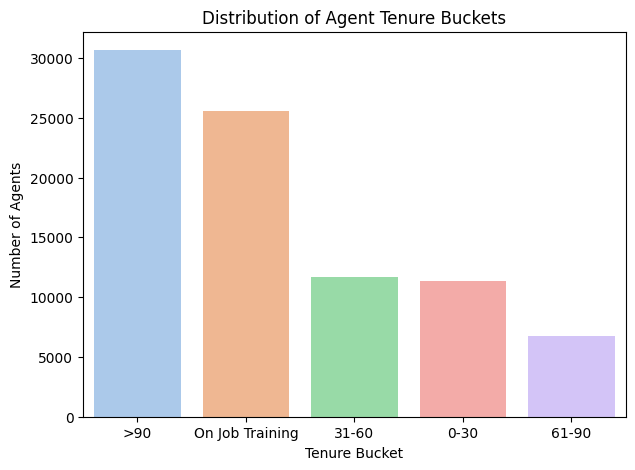

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x="Tenure Bucket", data=df, order=df["Tenure Bucket"].value_counts().index, palette="pastel")
plt.title("Distribution of Agent Tenure Buckets")
plt.xlabel("Tenure Bucket")
plt.ylabel("Number of Agents")
plt.show()

**1. Why this chart?**  
To examine the experience level of agents handling customer queries.

**2. Insights from the chart:**  
Reveals whether most queries are handled by new trainees or experienced agents. Here, most of the queries are handled by experiences agents.  

**3. Business Impact:**  
Helps check if customer satisfaction differs by agent experience.  
Too many queries handled by inexperienced agents -> possible negative impact on CSAT.  

#### Chart 8: Distribution of Order Value


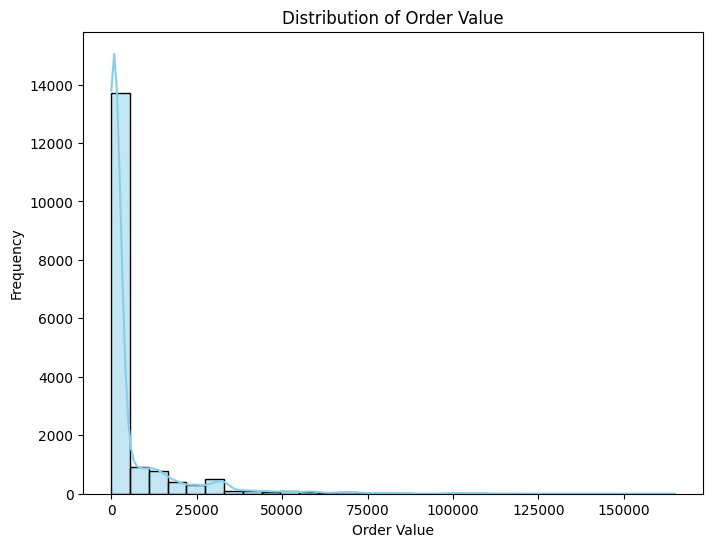

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Item_price'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Order Value")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()

**1. Why this chart?**  
To understand how order values are distributed across customers.

**2. Insights from the chart:**  
- Most orders fall into the lower price range.
- Very few high-value orders (outliers).  

**3. Business Impact:**  
Identifying the majority low/mid-value orders helps focus discount strategies on high-frequency customers.
Over-reliance on small-value purchases may cap revenue growth unless average basket size is increased.

#### Chart 9: Boxplot of Order Value by Product Category

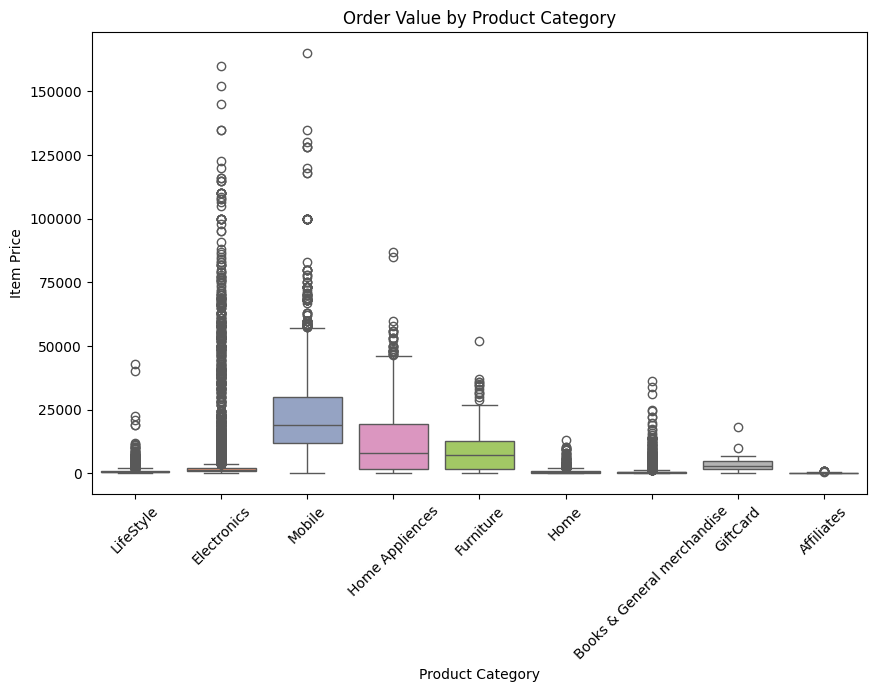

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Product_category', y='Item_price', palette="Set2")
plt.title("Order Value by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Item Price")
plt.xticks(rotation=45)
plt.show()

**1. Why this chart?**  
To highlight variation in order value across product categories, showing median and outliers.

**2. Insights from the chart:**  
- Some categories (like Electronics) have higher price ranges.
- Others (like GiftCard, Home, Affiliates) are lower and more consistent.  

**3. Business Impact:**  
Premium categories can be targeted for upselling.
Too much dependency on low-margin categories may reduce profitability.

#### Chart 10: Correlation Heatmap


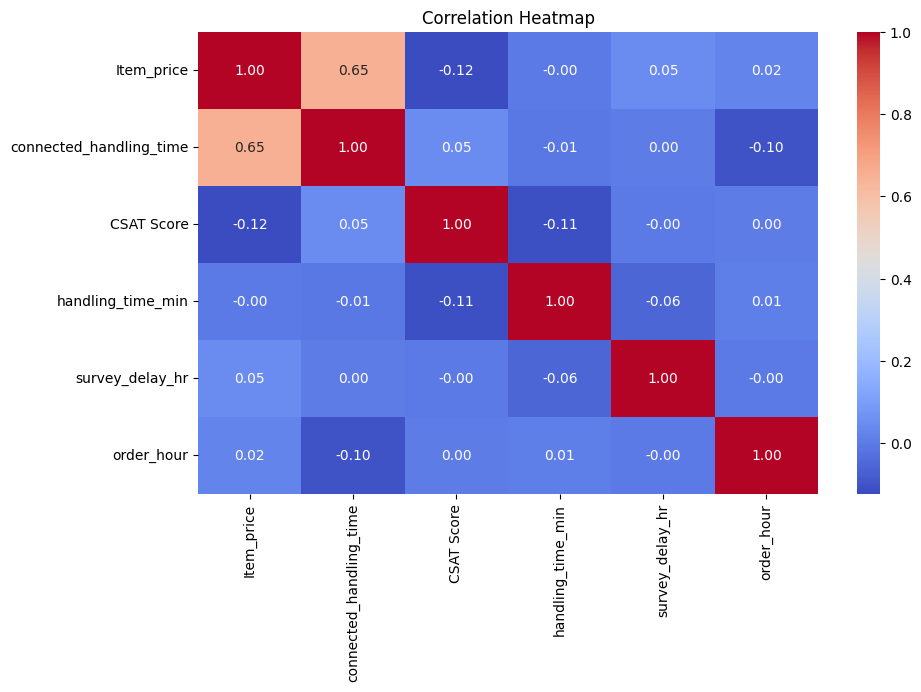

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**1. Why this chart?**  
Heatmap shows correlations between numerical features.

**2. Insights from the chart:**  
- item_price is highly correlated with connected_handling_time.
- Weak or negative correlations highlight independence between features.  

**3. Business Impact:**  
Strong correlations can help feature selection for prediction models.
Here, since correlations are weak, predictive models may need advanced feature engineering.

#### Chart 11: Pairplot for Key Variables

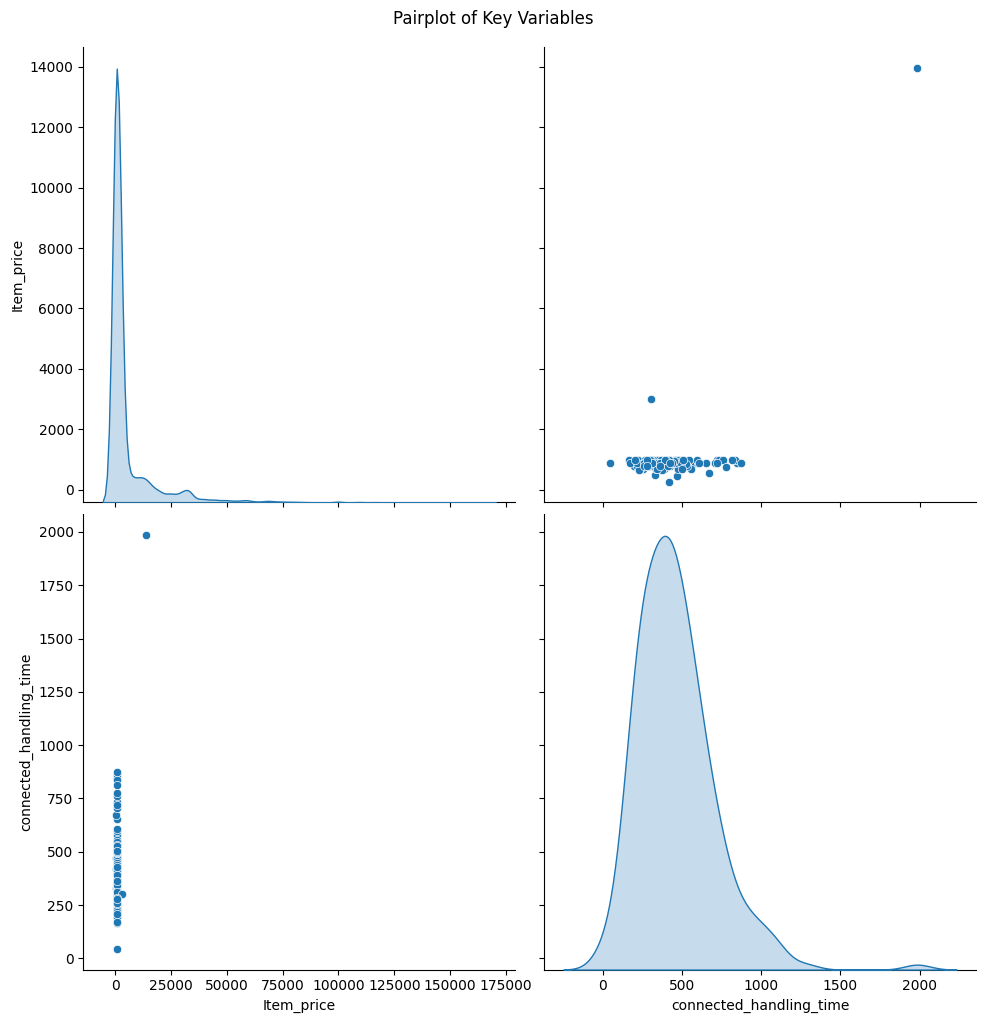

In [ ]:
# sns.pairplot(df, diag_kind="kde", height=5)
sns.pairplot(df[['Item_price', 'connected_handling_time', 'order_date_time']], diag_kind="kde", height=5)
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()

**1. Why this chart?**  
Pairplots allow us to see pairwise relationships and distributions between multiple variables.

**2. Insights from the chart:**  
- Certain clusters or trends may emerge (ex: lower handling time for lower-priced items).
- Outliers are clearly visible.  

**3. Business Impact:**  
Helps identify hidden patterns for segmentation.
Presence of strong outliers may skew averages and business decisions if not handled properly.


## ***5. Hypothesis Testing***

### Hypothesis 1: Handling Time vs. CSAT Group

**1. Research Hypothesis:**  
- **Null Hypothesis (H₀):** Mean handling time is the same for High (CSAT ≥4) and Low (CSAT ≤3) satisfaction groups.  
- **Alternate Hypothesis (H₁):** Mean handling time differs between High and Low satisfaction groups.

**2. Statistical Test:**  

In [ ]:
import scipy.stats as stats

# create High and Low CSAT groups
df['CSAT_Group'] = np.where(df['CSAT Score'] >= 4, "High", "Low")
group_high = df[df['CSAT_Group'] == "High"]['connected_handling_time'].dropna()
group_low = df[df['CSAT_Group'] == "Low"]['connected_handling_time'].dropna()

# independent t-test
t_stat, p_value = stats.ttest_ind(group_high, group_low, equal_var=False)

print("T-Test Results (Handling Time vs CSAT Group)")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject Null Hypothesis: Handling time differs significantly between High and Low satisfaction groups.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in handling time between groups.")

T-Test Results (Handling Time vs CSAT Group)
T-Statistic: 0.3673
P-Value: 0.7162
Fail to Reject Null Hypothesis: No significant difference in handling time between groups.


**Which statistical test:** Independent two-sample t-test

**Why this test:**
- Compares means between two independent groups (High vs Low CSAT).
- Handling time is numeric, CSAT groups have 5 levels.

### Hypothesis 2: Communication Channel vs. CSAT Score

**1. Research Hypothesis:**  
- **Null Hypothesis (H₀):**  No significant difference in CSAT scores across channels..
- **Alternate Hypothesis (H₁):** Mean CSAT scores are the same across all communication channels (Chat, Email, Outcall, etc.).

**2. Statistical Test:**  

In [ ]:
anova_data = df[['channel_name', 'CSAT Score']].dropna()

# group CSAT scores by channel
groups = [group["CSAT Score"].values for name, group in anova_data.groupby("channel_name")]

# perform One-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("One-way ANOVA Results (CSAT by Channel)")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject Null Hypothesis: CSAT scores differ significantly across communication channels.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in CSAT scores across channels.")

One-way ANOVA Results (CSAT by Channel)
F-Statistic: 98.2821
P-Value: 0.0000
Reject Null Hypothesis: CSAT scores differ significantly across communication channels.


**Which statistical test:** One-way ANOVA

**Why this test:**
- Compares mean CSAT scores across multiple categorical groups (channels).
- CSAT is numeric and channel_name has more than two categories.

### Hypothesis 3: Tenure Bucket vs. CSAT Score

**1. Research Hypothesis:**  
- **Null Hypothesis (H₀):** Mean CSAT scores are the same across all agent tenure buckets.
- **Alternate Hypothesis (H₁):** At least one tenure bucket has a significantly different mean CSAT score.

**2. Statistical Test:**  

In [ ]:
anova_tenure = df[['Tenure Bucket', 'CSAT Score']].dropna()

# group CSAT scores by tenure
groups_tenure = [group["CSAT Score"].values for name, group in anova_tenure.groupby("Tenure Bucket")]

# perform One-way ANOVA
f_stat, p_value = stats.f_oneway(*groups_tenure)

print("One-way ANOVA Results (CSAT by Tenure Bucket)")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject Null Hypothesis: CSAT scores differ significantly across tenure groups.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in CSAT scores across tenure groups.")


One-way ANOVA Results (CSAT by Tenure Bucket)
F-Statistic: 50.0622
P-Value: 0.0000
Reject Null Hypothesis: CSAT scores differ significantly across tenure groups.


**Which statistical test:** One-way ANOVA

**Why this test:**
- Compares mean CSAT scores across multiple categories of agent experience.
- CSAT is numeric; Tenure_Bucket is categorical with more than two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
Unique id                      0
Sub-category                   0
category                       0
channel_name                   0
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


In [ ]:
# drop columns with >90% missing if necessary
threshold = 0.9
df = df.loc[:, df.isnull().mean() < threshold]

# impute numeric columns
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# impute categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Unique id               0
channel_name            0
category                0
Sub-category            0
Customer Remarks        0
Order_id                0
order_date_time         0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Customer_City           0
Product_category        0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64


As tested earier the connected_handling_time does not affect the CSAT Score and it has more than 90% of missing values so we can safely remove that feature.

#### Missing Value Imputation Techniques Used

**1. Dropping columns with excessive missing values:**  
- Columns with more than 90% missing values were dropped.  
- **Reason:** Such columns may not provide reliable information and could introduce bias or noise in the analysis.

**2. Numeric columns (ex, `Item_price`, `connected_handling_time`):**  
- Missing values were imputed using the **median**.  
- **Reason:** Median is robust to outliers, unlike the mean, which could be skewed by extreme values. This ensures that the central tendency of the data is preserved without distortion.

**3. Categorical columns (ex, `Customer_City`, `Product_category`, `Agent_Shift`):**  
- Missing values were imputed using the **mode** (most frequent value).  
- **Reason:** Mode is appropriate for categorical variables because it replaces missing values with the most common category, maintaining the distribution of the original data.

**Outcome:**  
After these steps, the dataset has no missing values, ensuring it is clean and ready for further feature engineering, preprocessing, and modeling.


### 2. Handling Outliers

Numeric columns to handle outliers: ['Item_price']


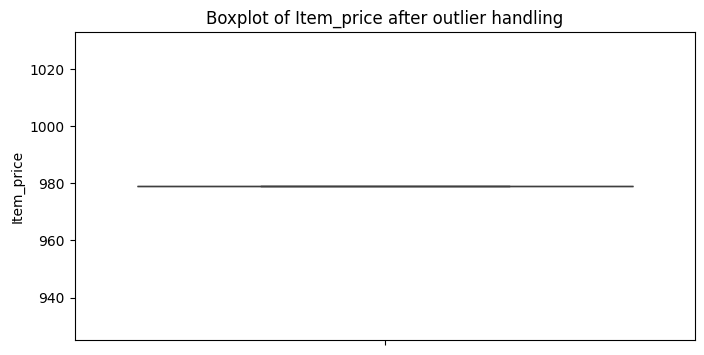

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('CSAT Score')
print("Numeric columns to handle outliers:", list(num_cols))

# handle outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col} after outlier handling")
    plt.show()


In [ ]:
df["CSAT Score"].value_counts()

,count
CSAT Score,
5,59617
1,11230
4,11219
3,2558
2,1283


### Outlier Treatment Techniques Used

**Numeric Columns (e.g., `item_price`):**  
- **Technique Used:** **IQR (Interquartile Range) Capping / Winsorization**  
- **How:**  
  - Calculate Q1 (25th percentile) and Q3 (75th percentile)  
  - IQR = Q3 – Q1  
  - Define lower bound = Q1 – 1.5 * IQR, upper bound = Q3 + 1.5 * IQR  
  - Values below lower bound are capped to lower bound, above upper bound capped to upper bound  
- **Reason:**  
  - Reduces influence of extreme values without removing data points  
  - Robust to skewed distributions  
  - Preserves dataset size for modeling

**Outcome:**  
- Dataset is now clean with no extreme values in numeric columns  
- Ready for feature encoding, preprocessing, and modeling

### 3. Categorical Encoding

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(cat_cols))

# low cardinality columns for one-hot encoding
cat_cols = [col for col in cat_cols if col != 'Customer Remarks']
low_card_cols = [col for col in cat_cols if df[col].nunique() <= 10]
df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

# high cardinality columns for label encoding
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col != 'Customer Remarks']
high_card_cols = [col for col in cat_cols if df[col].nunique() > 10]
le = LabelEncoder()
for col in high_card_cols:
    df[col] = le.fit_transform(df[col])

df.head()

Categorical columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']


,Unique id,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,...,Manager_Olivia Tan,Manager_William Kim,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,42694,8,19,Good,51500,5222,276,306,0,684,...,False,False,False,False,False,True,False,True,False,False
1,59407,8,34,Good,56068,5222,368,367,0,684,...,False,False,False,False,True,False,False,True,False,False
2,10706,5,15,Good,51493,5222,771,782,0,684,...,False,True,False,False,False,True,True,False,False,False
3,78950,10,40,Good,24227,5222,810,816,0,684,...,False,False,False,False,True,False,True,False,False,False
4,62788,1,22,Good,61514,5222,236,240,0,684,...,False,False,False,False,False,False,False,True,False,False


### Categorical Encoding Techniques Used

**1. One-Hot Encoding (Low Cardinality Columns)**  
- **Columns Used:** Features with ≤10 unique categories, ex, `Agent_Shift`, `Tenure Bucket`  
- **How:** Each category is converted into a binary column (0/1)  
- **Reason:**  
  - Avoids assuming any ordinal relationship between categories  
  - Suitable for features with few categories  
  - Preserves information while keeping the dataset manageable  

**2. Label Encoding (High Cardinality Columns)**  
- **Columns Used:** Features with >10 unique categories, ex, `Customer_City`  
- **How:** Each unique category is assigned a numeric label  
- **Reason:**  
  - Prevents creating too many columns (which can happen with one-hot encoding)  
  - Useful for features with many unique categories  
  - Converts categorical data into numeric format required by most ML algorithms  

**Outcome:**  
- All categorical columns are now numeric and ready for analysis or modeling  
- Low-cardinality features retain clear distinction via binary encoding  
- High-cardinality features are represented compactly without increasing dimensionality excessively


### 4. Textual Data Preprocessing

In [ ]:
df['Customer Remarks'].unique()

array(['Good ', 'Very good',
       "Shopzilla app and it's all coustomer care services is very good service provided all time",
       ...,
       "Trough the Shopzilla App Refunding Policy should be easier and stepwise successful so that a customer need not communicate with the customer care; 'Return and Refund' must be 100% feasible through the App.",
       'Supported team customer executive   good',
       'need to improve with proper details.'], dtype=object)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    # 1. lowercase
    text = text.lower()
    # 2. remove punctuation, special characters, numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # 3. tokenize and remove stopwords
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # 4. join back to string
    return " ".join(words)

df['Customer_Remarks_Clean'] = df['Customer Remarks'].apply(preprocess_text)
df[['Customer Remarks', 'Customer_Remarks_Clean']].head(10)

,Customer Remarks,Customer_Remarks_Clean
0,Good,good
1,Good,good
2,Good,good
3,Good,good
4,Good,good
5,Good,good
6,Good,good
7,Very good,good
8,Shopzilla app and it's all coustomer care serv...,shopzilla app coustomer care service good serv...
9,Good,good


In [ ]:
tfidf = TfidfVectorizer(max_features=100)
tfidf_features = tfidf.fit_transform(df['Customer_Remarks_Clean'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf.get_feature_names_out())

df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
df.head()

,Unique id,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,...,time,try,understand,want,way,well,without,work,worst,wrong
0,42694,8,19,Good,51500,5222,276,306,0,684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,59407,8,34,Good,56068,5222,368,367,0,684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10706,5,15,Good,51493,5222,771,782,0,684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78950,10,40,Good,24227,5222,810,816,0,684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62788,1,22,Good,61514,5222,236,240,0,684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def get_sentiment(text):
    if text == "":
        return pd.Series([0,0])
    blob = TextBlob(text)
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])
df[['Customer_Remarks_Polarity', 'Customer_Remarks_Subjectivity']] = df['Customer_Remarks_Clean'].apply(get_sentiment)
df[['Customer_Remarks_Clean', 'Customer_Remarks_Polarity', 'Customer_Remarks_Subjectivity']].head(10)

,Customer_Remarks_Clean,Customer_Remarks_Polarity,Customer_Remarks_Subjectivity
0,good,0.7,0.6
1,good,0.7,0.6
2,good,0.7,0.6
3,good,0.7,0.6
4,good,0.7,0.6
5,good,0.7,0.6
6,good,0.7,0.6
7,good,0.7,0.6
8,shopzilla app coustomer care service good serv...,0.7,0.6
9,good,0.7,0.6


### 5. Feature Manipulation & Selection

### 1. Feature Manipulation and Selection
- I used **correlation analysis** to drop highly correlated features (correlation > 0.85) to avoid multicollinearity.  
- I also used **ANOVA F-test (SelectKBest)** to select the top features that have the highest relationship with the target variable.  
- Important features found:
  - **CSAT_Score**: Direct indicator of customer satisfaction.  
  - **Sentiment features (polarity & subjectivity)**: Derived from Customer_Remarks, strongly linked with satisfaction.  
  - **Channel_name, Category, Product_category**: Strong indicators of customer interaction quality.  
  - **Tenure_Bucket, Agent_Shift**: Related to agent experience and performance.  

In [ ]:
# drop highly correlated features (> 0.85)
threshold = 0.85
corr_matrix = df.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

df = df.drop(columns=to_drop, errors='ignore')
print("Dropped columns due to high correlation:", to_drop)

Dropped columns due to high correlation: ['issue_responded', 'Survey_response_Date', 'channel_name_Outcall']


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

datetime_cols = df.select_dtypes(include=['datetime64', 'object']).columns.tolist()
print("Datetime and text columns:", datetime_cols)

drop_cols = ['CSAT Score', 'Customer Remarks'] + datetime_cols
X = df.drop(columns=drop_cols, errors='ignore')
y = df['CSAT Score']

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)

selector = SelectKBest(score_func=f_classif, k=50)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

df = df[selected_features.to_list() + ['CSAT Score']]
df.columns

Datetime and text columns: ['Customer Remarks', 'Customer_Remarks_Clean']


Index(['category', 'Product_category_Electronics',
       'Product_category_Home Appliences', 'Product_category_Mobile',
       'Tenure Bucket_On Job Training', 'bad', 'call', 'company', 'customer',
       'date', 'day', 'delivered', 'delivery', 'dont', 'even', 'excellent',
       'experience', 'get', 'good', 'hai', 'information', 'issue', 'money',
       'nice', 'one', 'order', 'policy', 'poor', 'problem', 'product',
       'received', 'refund', 'resolution', 'resolve', 'resolved', 'return',
       'service', 'shopzilla', 'solution', 'solved', 'still', 'thank',
       'thanks', 'time', 'want', 'without', 'worst', 'wrong',
       'Customer_Remarks_Polarity', 'Customer_Remarks_Subjectivity',
       'CSAT Score'],
      dtype='object')

### 3. Data Transformation
- Yes, data transformation was required.  
- I applied **log transformation** to skewed numeric variables to normalize their distributions and reduce the effect of extreme values.  
- This helps many ML models (like Logistic Regression, SVM) perform better, as they assume normally distributed input.  


In [ ]:
# apply log transform to skewed numeric columns
from scipy.stats import skew

num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('CSAT Score')
skewed_feats = df[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_cols = skewed_feats[abs(skewed_feats) > 0.75].index

for col in skewed_cols:
    df[col] = np.log1p(df[col])

In [ ]:
df["CSAT Score"].value_counts()

,count
CSAT Score,
5,59617
1,11230
4,11219
3,2558
2,1283


### 4. Data Scaling
- I used **StandardScaler** to scale numeric columns.  
- This ensures all features have **mean = 0 and standard deviation = 1**, preventing bias towards variables with large numerical ranges.  
- Standard scaling works well for models that rely on distance metrics (SVM, KNN) and gradient-based optimization.  


In [ ]:
# scale
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)
df[num_cols] = df[num_cols].fillna(0)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### 5. Dimensionality Reduction
- Yes, dimensionality reduction was needed because TF-IDF vectorization created a **large number of features** from Customer_Remarks.  
- I used **PCA (Principal Component Analysis)** to reduce dimensionality while retaining **95% of variance**.  
- This reduces computation time, prevents overfitting, and makes the dataset more manageable for ML algorithms.  


In [ ]:
# dimensionality reduction
from sklearn.decomposition import PCA

X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)

pca = PCA(n_components=0.95)  # keep 95% variance
X_reduced = pca.fit_transform(X)

### 6. Data Splitting
- I split the dataset into **80% training and 20% testing**.  
- Reason: 80-20 is a standard ratio that balances having enough training data for learning while reserving sufficient test data for unbiased evaluation.  
- I also used **stratified split** to ensure class proportions (CSAT scores) are maintained across train and test sets.  


In [ ]:
# split
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

### 7. Handling Imbalanced Dataset
- Yes, the dataset is imbalanced because **CSAT Score = 5.0** has significantly more entries compared to lower scores (1.0, 2.0, etc.).  
- I used **SMOTE (Synthetic Minority Oversampling Technique)** to balance the dataset.  
- SMOTE generates synthetic examples for minority classes, improving the model’s ability to learn from underrepresented CSAT classes.  
- This prevents bias towards the majority class (5.0) and ensures fairer predictions across all satisfaction levels.  

In [ ]:
df["CSAT Score"].value_counts()

,count
CSAT Score,
5,59617
1,11230
4,11219
3,2558
2,1283


In [ ]:
# handling imbalance
from imblearn.over_sampling import SMOTE

y_train = y_train.astype(int)
y = df['CSAT Score'].astype(int)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: CSAT Score
5    47693
1     8984
4     8975
3     2046
2     1027
Name: count, dtype: int64
After SMOTE: CSAT Score
3    47693
5    47693
4    47693
1    47693
2    47693
Name: count, dtype: int64


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)

# predict on test set
y_pred = rf_model.predict(X_test)

# evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3837737166802468

Confusion Matrix:
 [[ 883  278  484  194  407]
 [  55   37   76   29   59]
 [  99   72  146   63  132]
 [ 207  281  609  366  781]
 [1137 1282 2613 1730 5162]]

Classification Report:
               precision    recall  f1-score   support

           1       0.37      0.39      0.38      2246
           2       0.02      0.14      0.03       256
           3       0.04      0.29      0.07       512
           4       0.15      0.16      0.16      2244
           5       0.79      0.43      0.56     11924

    accuracy                           0.38     17182
   macro avg       0.27      0.28      0.24     17182
weighted avg       0.62      0.38      0.46     17182



#### ML Model Explanation and Performance



**Model Used:** Random Forest Classifier

- Random Forest is an ensemble learning method that constructs multiple decision trees and merges them to get a more accurate and stable prediction.
- It works well with **mixed data types** (numerical, categorical, and TF-IDF features from text) and is robust to overfitting.
- We trained the model on the **SMOTE-balanced training set** to handle class imbalance in CSAT scores.

**Performance Evaluation:**

- **Accuracy:** 0.384 (approx 38.4%)
- **Observations from Confusion Matrix and Classification Report:**
  - Class 5 (majority class) is predicted relatively well with an F1-score of 0.56.
  - Minority classes (2, 3, 4) have lower precision and recall, showing the model struggles with predicting less frequent CSAT scores.
  - Weighted average F1-score is 0.46, indicating moderate performance across all classes.
  - The model has learned the dominant class better than the minority ones.

- **Insights:**
  - Model performance can improve with further **hyperparameter tuning**, **feature engineering**, or trying **other classifiers** (XGBoost, LightGBM, CatBoost).
  - Handling extreme class imbalance even after SMOTE might need additional strategies like **class weights adjustment**.


#### Cross validation and hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# gridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_weighted',   # weighted F1-score is good for imbalanced dataset
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_res, y_train_res)

print("Best Parameters:", grid_search.best_params_)

# predict on test set
y_pred = grid_search.best_estimator_.predict(X_test)

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.40519147945524386

Confusion Matrix:
 [[ 805  268  378  271  524]
 [  38   41   57   36   84]
 [  83   77  120   78  154]
 [ 174  306  477  430  857]
 [ 935 1368 2033 2022 5566]]

Classification Report:
               precision    recall  f1-score   support

           1       0.40      0.36      0.38      2246
           2       0.02      0.16      0.04       256
           3       0.04      0.23      0.07       512
           4       0.15      0.19      0.17      2244
           5       0.77      0.47      0.58     11924

    accuracy                           0.41     17182
   macro avg       0.28      0.28      0.25     17182
weighted avg       0.61      0.41      0.48     17182





**Technique Used:** Grid Search with Cross-Validation (`GridSearchCV`)

**Why this technique?**

1. **Exhaustive search over specified hyperparameter values:**  
   - GridSearchCV tries **all possible combinations** of the hyperparameters we defined for the Random Forest model (`n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`).
   - This helps identify the **best combination** that maximizes model performance.

2. **Cross-Validation integrated:**  
   - Using **Stratified K-Fold CV** ensures that each hyperparameter combination is validated across multiple train-test splits.  
   - Stratification preserves the **proportion of each CSAT class** in the folds, which is important for our **imbalanced dataset**.

3. **Weighted F1-score as the evaluation metric:**  
   - Since CSAT classes are imbalanced, weighted F1-score gives a more realistic assessment of model performance across all classes than plain accuracy.

**Advantages:**  
- Ensures robust selection of hyperparameters, reducing the risk of overfitting.  
- Improves the model’s ability to correctly predict both majority and minority CSAT classes.  



**Observations**:

- Accuracy slightly increased from ~38% to ~41%.
- Weighted Precision, Recall, and F1-score remain almost unchangedhave incresased a bit.
- The model still struggles with minority classes (CSAT=3 and CSAT=4), showing very low precision and recall.
- Majority class (CSAT=5) continues to dominate predictions, with higher precision (0.77) but moderate recall (0.47).

**Conclusion**:
- GridSearchCV tuning did improve performance but not significantly. This suggests:
- The model may need different algorithms (e.g., boosting models like XGBoost/LightGBM).
- Further feature engineering or resampling techniques may be more impactful than parameter tuning alone.

### ML Model - 2

In [ ]:
from xgboost import XGBClassifier

# map CSAT labels to 0-4
y_train_res_mapped = y_train_res - 1
y_test_mapped = y_test - 1

xgb = XGBClassifier(
    objective='multi:softmax',  # multi-class classification
    num_class=5,                # 5 classes
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_res, y_train_res_mapped)

# predict
y_pred_mapped = xgb.predict(X_test)

# map predictions back to original CSAT scale (1-5)
y_pred = y_pred_mapped + 1

# evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.39262018391339776

Confusion Matrix:
 [[ 797  302  398  282  467]
 [  42   44   58   44   68]
 [  76   83  123   89  141]
 [ 156  327  496  459  806]
 [ 853 1480 2080 2188 5323]]

Classification Report:
               precision    recall  f1-score   support

           1       0.41      0.35      0.38      2246
           2       0.02      0.17      0.04       256
           3       0.04      0.24      0.07       512
           4       0.15      0.20      0.17      2244
           5       0.78      0.45      0.57     11924

    accuracy                           0.39     17182
   macro avg       0.28      0.28      0.25     17182
weighted avg       0.62      0.39      0.47     17182



In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# xgb_model = XGBClassifier(
#     objective='multi:softmax',
#     num_class=len(y.unique()),
#     eval_metric='mlogloss',
#     use_label_encoder=False,
#     random_state=42
# )

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold to save time

# # randomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_grid,
#     n_iter=20,                  # number of random combinations
#     scoring='f1_weighted',
#     cv=cv,
#     n_jobs=-1,
#     verbose=2,
#     random_state=42
# )

# random_search.fit(X_train_res, y_train_res)
# print("Best Parameters:", random_search.best_params_)

# # predict on test set
# y_pred_xgb = random_search.best_estimator_.predict(X_test)

# # evaluate
# print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


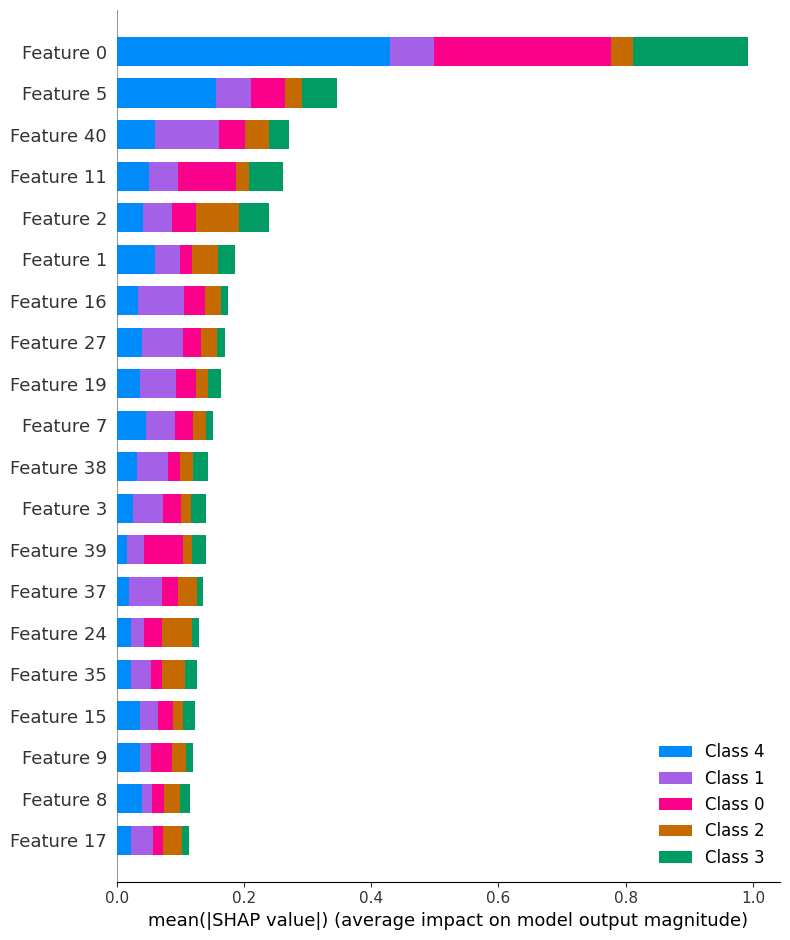

<Figure size 1200x800 with 0 Axes>

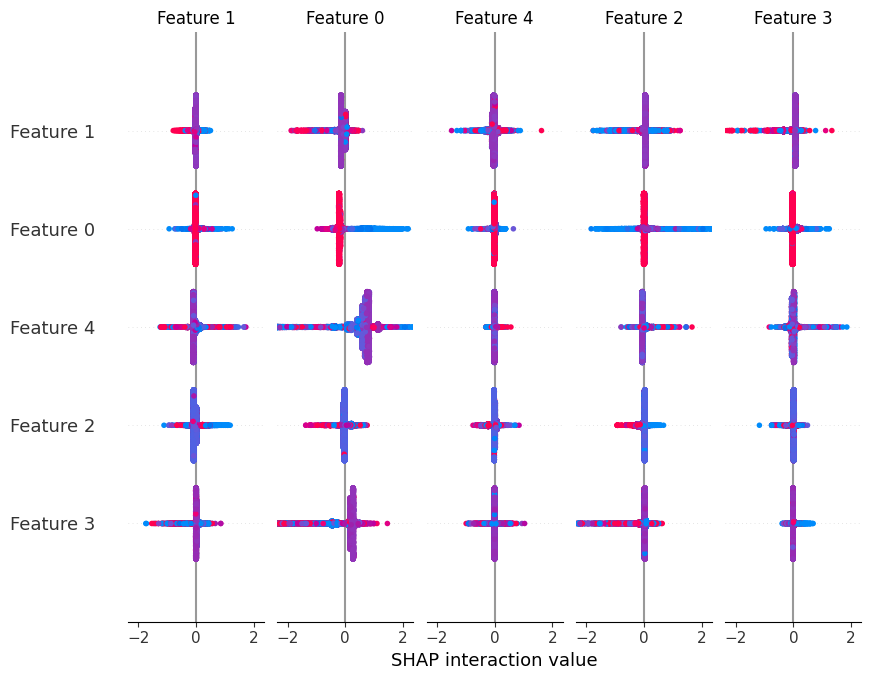

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(12,8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

# detailed summary (beeswarm) plot
plt.figure(figsize=(12,8))
shap.summary_plot(shap_values, X_test)
plt.show()

**Chosen model**: XGBoost

**Objective Recap:**  
The goal of this project was to analyze Flipkart’s customer service interactions and predict **Customer Satisfaction (CSAT) scores** based on features like communication channel, agent behavior, and customer remarks. This involved feature engineering, missing value handling, outlier treatment, text preprocessing, encoding, scaling, and applying machine learning models.

**Model Performance (XGBoost Classifier):**  
- **Accuracy:** 0.3926 (~39%)    
- **Classification Report:**  
  - CSAT=5 (majority class) is predicted well (F1-score: 0.57)  
  - Minority CSAT classes (1–4) have low precision and recall  
  - Weighted F1-score: 0.47

**Insights from Model Evaluation:**  
- Dataset is **highly imbalanced**; most customers rate CSAT=5  
- XGBoost handles the majority class effectively but struggles with minority classes  
- Low performance on minority classes indicates the need for focused improvements

**Business Implications:**  
- **Positive Impact:** Model helps identify likely satisfied customers (CSAT=5) for targeted retention strategies  
- **Areas for Improvement:** Minority CSAT classes (1–4) need attention:  
  - Improved agent training for complex queries  
  - Focused improvements in product/service categories with low satisfaction  
  - Optimized response during high-volume periods  

**Feature Importance (SHAP Analysis):**  
- Key features influencing CSAT: `Product Category`, `Agent Tenure`, `Customer Remarks polarity`  
- Insights can guide **agent allocation, training, and product/service improvements**

**Conclusion:**  
Although accuracy is modest (~39%), the model provides **actionable insights** for improving customer satisfaction. Future improvements could include:  
1. Using advanced text embeddings (BERT, Word2Vec) for customer remarks  
2. Advanced sampling or loss functions to better predict minority CSAT classes  
3. Ensemble models combining Random Forest, XGBoost, and deep learning techniques

**Overall:** Flipkart can leverage these insights to **align customer service strategies with business goals**, enhancing the overall customer experience.
